In [1]:
import pandas as pd 
import sklearn
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('owid_mobility_europe_data.csv')

In [3]:
germany_df = df[df["location"] == "Germany"]
germany_df = germany_df.drop("location", axis =1)
germany_df = germany_df.set_index("date")

In [35]:
def deaths_v_stringency(df, country_name):
    max_lag = 30
    for variable in ["new_deaths_per_million", 
                     "positive_rate", 
                     "weekly_hosp_admissions_per_million"]:
        lag_corr = []
        lag = []
        for k in range(-max_lag,max_lag+1):
            lag_df = df.shift(k)
            lag_corr.append(df[variable].corr(lag_df["stringency_index"]))
            lag.append(k)
        plt.figure()
        plt.plot(lag, lag_corr)    
        plt.xlim(-max_lag,max_lag)
        plt.ylabel("Correlation")
        plt.xlabel("Lag")
        if variable == "new_deaths_per_million":
            plt.title("{}: Deaths/Stringency Lag".format(country_name))
        elif variable == "positive_rate":
            plt.title("{}: Positive Rate/Stringency Lag".format(country_name))
        elif variable == "weekly_hosp_admissions_per_million":
            plt.title("{}: Hospital Patients/Stringency Lag".format(country_name))

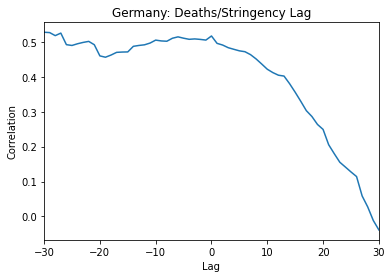

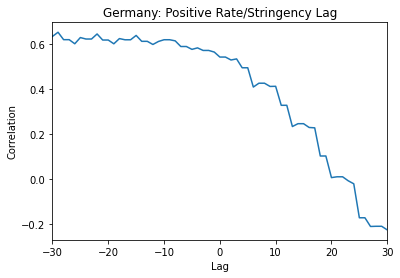

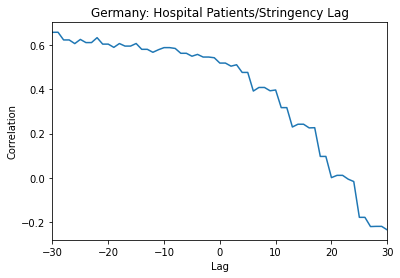

In [36]:
deaths_v_stringency(germany_df, "Germany")

In [37]:
def deaths_v_driving(df, country_name):
    max_lag = 30
    for variable in ["new_deaths_per_million", 
                     "positive_rate", 
                     "weekly_hosp_admissions_per_million"]:
        lag_corr = []
        lag = []
        for k in range(-max_lag,max_lag+1):
            lag_df = df.shift(k)
            lag_corr.append(df[variable].corr(lag_df["driving"]))
            lag.append(k)
        plt.figure()
        plt.plot(lag, lag_corr)  
        plt.ylabel("Correlation")
        plt.xlabel("Lag")
        plt.xlim(-max_lag,max_lag)
        if variable == "new_deaths_per_million":
            plt.title("{}: Deaths/Driving Lag".format(country_name))
        elif variable == "positive_rate":
            plt.title("{}: Positive Rate/Driving Lag".format(country_name))
        elif variable == "weekly_hosp_admissions_per_million":
            plt.title("{}: Hospital Patients/Driving Lag".format(country_name))

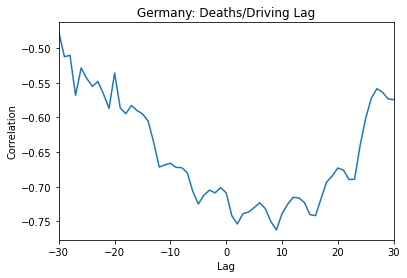

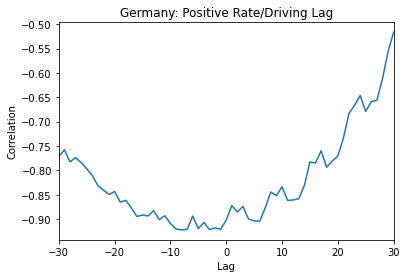

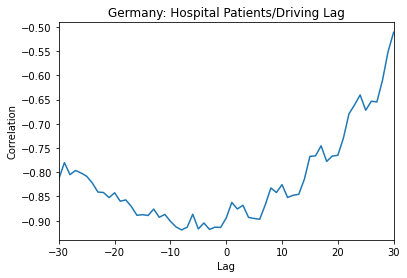

In [38]:
    
deaths_v_driving(germany_df, "Germany")
## maybe this says:
## people drive less after lots of deaths ?

In [39]:
def transport_corr(df, country_name, variable):
    transport = ["driving", "walking", "transit"]
    max_lag = 30
    for mode in transport:
        lag_corr = []
        lag = []
        for k in range(-max_lag,max_lag+1):
            lag_df = df.shift(k)
            lag_corr.append(df[variable].corr(lag_df[mode]))
            lag.append(k)
        plt.figure()
        plt.plot(lag, lag_corr)    
        plt.xlim(-max_lag,max_lag)
        plt.ylim(-1,1)
        plt.ylabel("Correlation")
        plt.xlabel("Lag")
        plt.plot(lag, np.ones(len(lag))*0.8, "--",)
        plt.plot(lag, -0.8*np.ones(len(lag)), "--",)
        plt.plot(lag, np.zeros(len(lag)), "--",)
        plt.title("{}: {}/{} Lag".format(country_name, variable, mode))
    ## maximum/minimum at negative lag means
    ## the mode of transport influenced later variable
    ## maximum/minimum at positive lag means
    ## variable later influenced the mode of transport
        

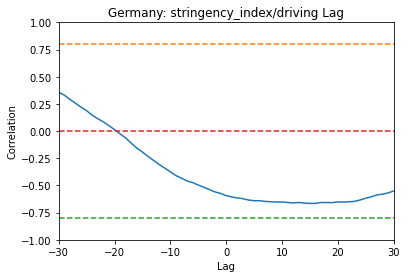

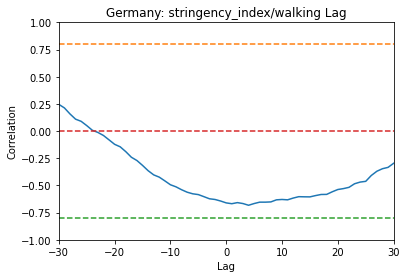

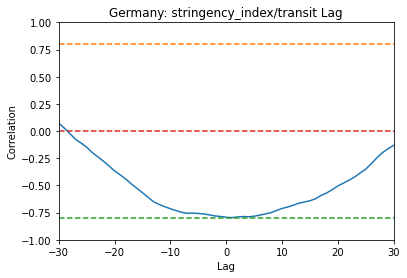

In [40]:
transport_corr(germany_df, "Germany", "stringency_index")

## increase in stringency causes a peak decrease in driving for 10-20 days
## increase in stringency causes a peak decrease in walking for <5 days
## transit and stringency increase don't have a time lag between them

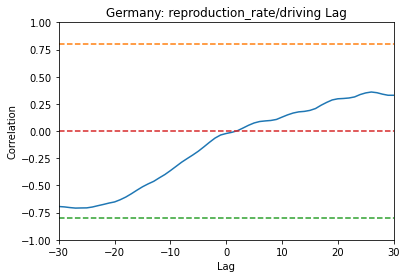

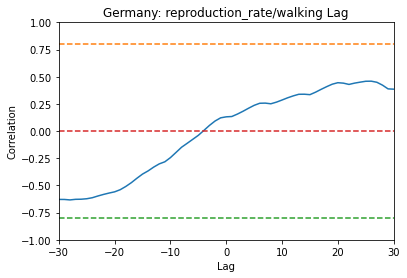

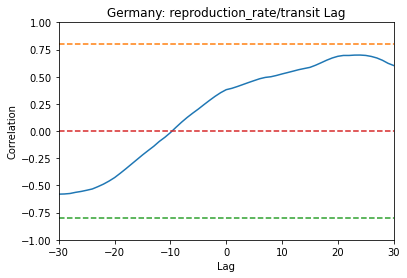

In [41]:
transport_corr(germany_df, "Germany", "reproduction_rate")
## increase in driving/walking/transit causes decrease in R in 20 days ?
## increase in R causes increase in driving/walking/transit in 20 days  ?
## not great really! 

In [9]:
slovakia_df = df[df["location"] == "Slovakia"]
slovakia_df = slovakia_df.drop("location", axis =1)
slovakia_df = slovakia_df.set_index("date")

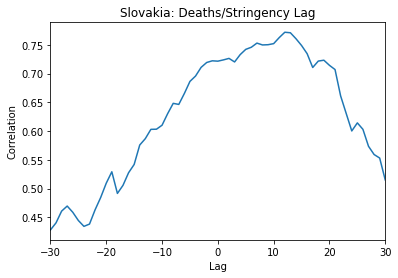

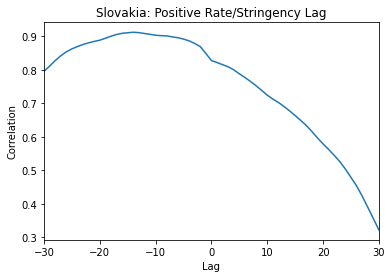

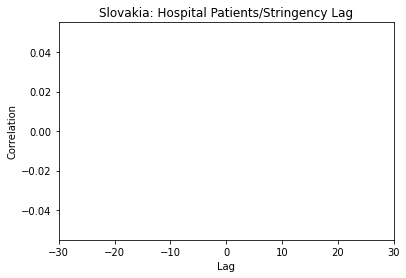

In [42]:
deaths_v_stringency(slovakia_df, "Slovakia")

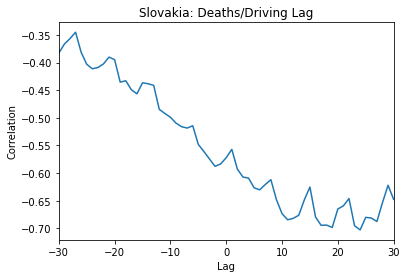

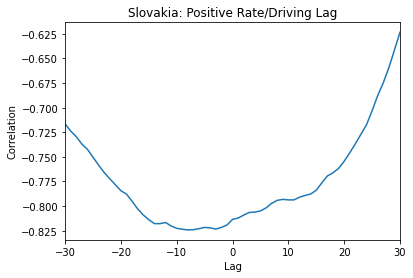

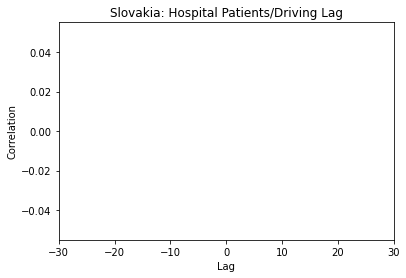

In [43]:
deaths_v_driving(slovakia_df, "Slovakia")
## driving decrease correlated with positive rate increase in 10 days?

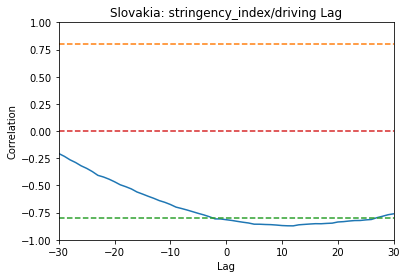

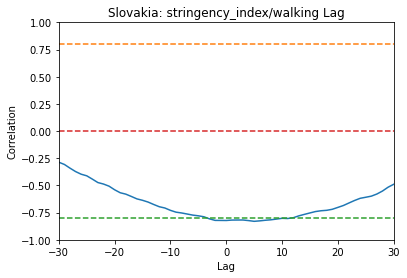

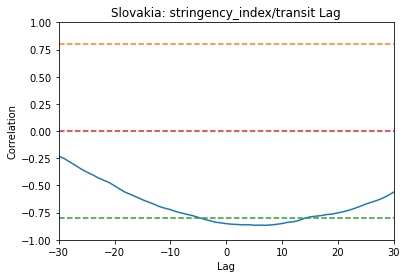

In [44]:
transport_corr(slovakia_df, "Slovakia", "stringency_index")

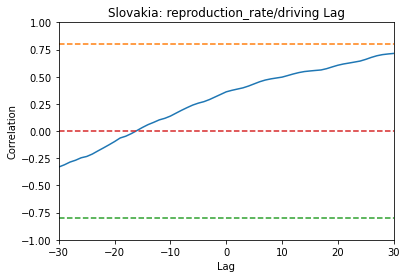

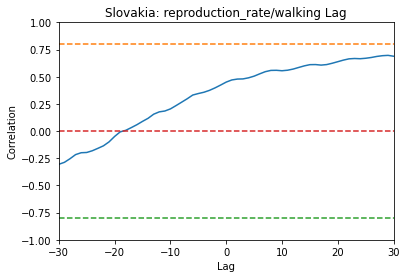

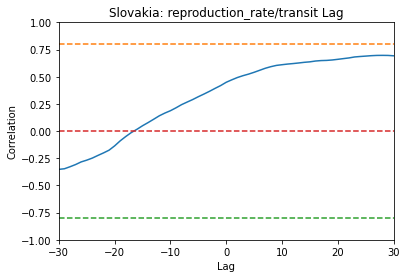

In [45]:
transport_corr(slovakia_df, "Slovakia", "reproduction_rate")

In [14]:
france_df = df[df["location"] == "France"]
france_df = france_df.drop("location", axis =1)
france_df = france_df.set_index("date")

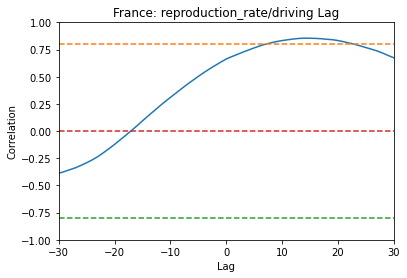

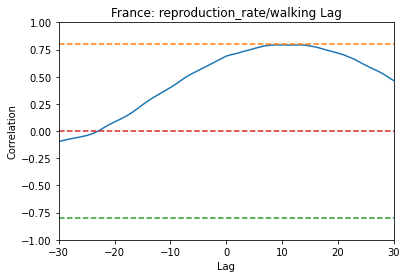

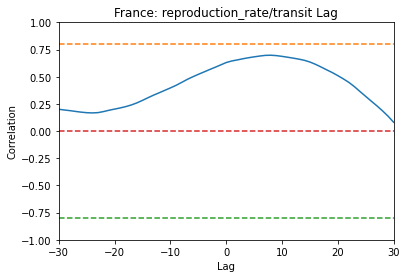

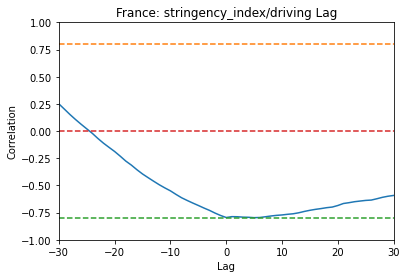

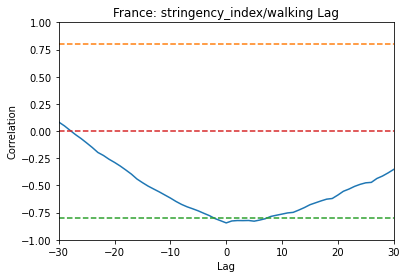

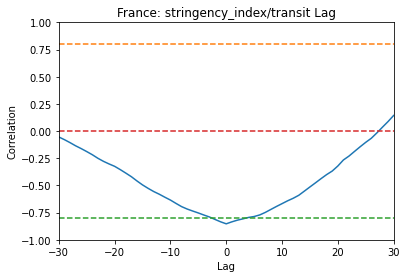

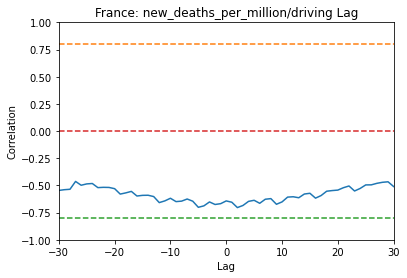

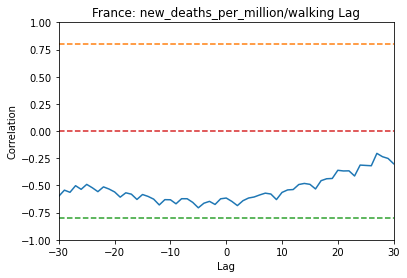

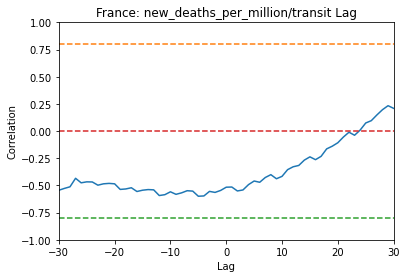

In [46]:
transport_corr(france_df, "France", "reproduction_rate")
transport_corr(france_df, "France", "stringency_index")
transport_corr(france_df, "France", "new_deaths_per_million")